In [1]:
import pandas as pd
df = pd.read_csv('../data/hotel_bookings.csv')
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     20000 non-null  int64  
 1   deposit_type                    20000 non-null  object 
 2   lead_time                       19995 non-null  float64
 3   stays_in_weekend_nights         20000 non-null  int64  
 4   stays_in_week_nights            20000 non-null  int64  
 5   is_repeated_guest               19642 non-null  float64
 6   previous_cancellations          20000 non-null  int64  
 7   previous_bookings_not_canceled  20000 non-null  int64  
 8   booking_changes                 20000 non-null  int64  
 9   days_in_waiting_list            20000 non-null  int64  
 10  adr                             18937 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


In [3]:
df.isnull().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

In [4]:
df['is_canceled'].value_counts()

0    17600
1     2400
Name: is_canceled, dtype: int64

<AxesSubplot:>

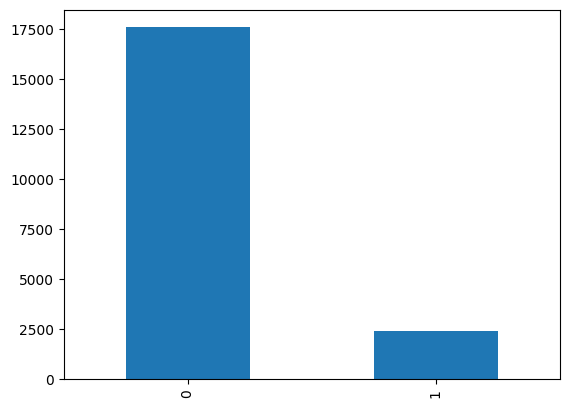

In [5]:
df['is_canceled'].value_counts().plot(kind='bar')

In [6]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
mean,0.12000,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
max,1.00000,629.000000,13.000000,30.000000,1.000000,26.000000,66.000000,17.000000,379.000000,451.500000


<AxesSubplot:>

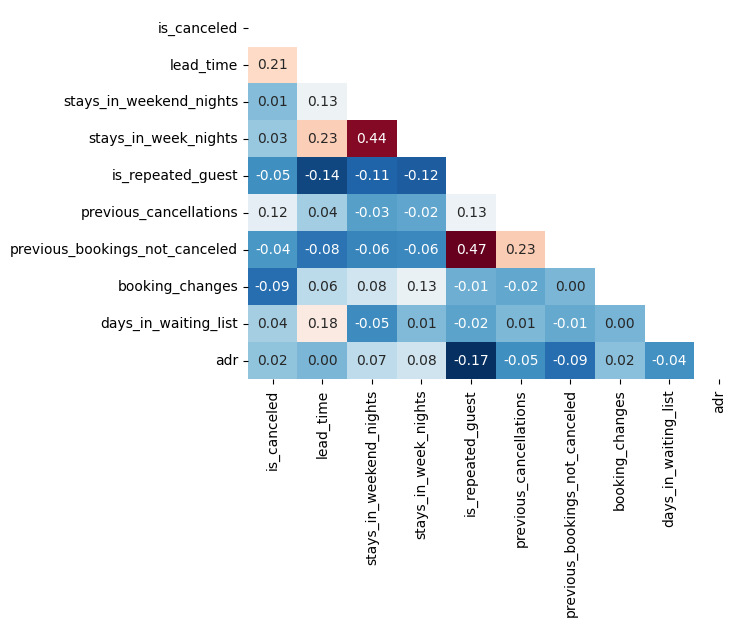

In [7]:
import seaborn as sns
import numpy as np
corr_df = df.corr()
mask = np.triu(np.ones(corr_df.shape, dtype='bool'))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='RdBu_r', cbar=False, fmt='.2f')

In [8]:
df.groupby('deposit_type').median()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
deposit_type,,,,,,,,,,
No Deposit,0,47.0,1,2,0.0,0,0,0,0,95.0
Non Refund,1,175.0,0,2,0.0,0,0,0,0,89.0
Refundable,0,169.0,1,3,0.0,0,0,1,0,66.0


In [9]:
hotel_nonull = df.copy()

hotel_nonull.dropna(subset=['lead_time'], axis=0, inplace=True)

hotel_nonull['is_repeated_guest'].fillna(hotel_nonull['is_repeated_guest'].mode()[0])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    0.0
19996    0.0
19997    0.0
19998    0.0
19999    0.0
Name: is_repeated_guest, Length: 19995, dtype: float64

In [10]:
fill_mean_func = lambda g: g.fillna(g.mean())
hotel_nonull = hotel_nonull.groupby('deposit_type').apply(fill_mean_func)

In [11]:
hotel_nonull.index = hotel_nonull.index.droplevel(0)
hotel_nonull.sort_index(inplace=True)
hotel_nonull.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

In [12]:
hotel_nonull

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,0.039532,0,0,1,0,131.500000
1,0,No Deposit,303.0,2,2,0.039532,0,0,0,0,73.950000
2,0,No Deposit,33.0,2,3,0.000000,0,0,0,0,101.965827
3,0,No Deposit,48.0,0,1,0.000000,0,0,1,0,80.300000
4,0,No Deposit,216.0,4,7,0.000000,0,0,2,0,60.900000
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.000000,0,0,0,0,62.000000
19996,1,Non Refund,101.0,0,3,0.000000,0,0,0,0,130.000000
19997,1,Non Refund,277.0,1,2,0.000000,0,0,0,0,100.000000
19998,1,No Deposit,0.0,0,1,0.000000,0,0,0,0,209.000000


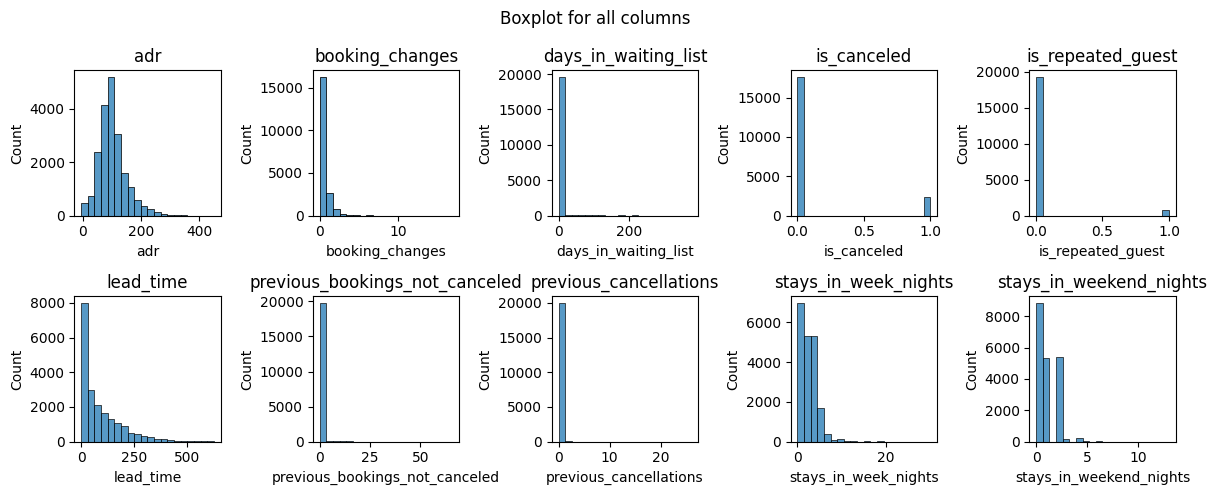

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))
for idx, col in enumerate(hotel_nonull.columns.difference(['deposit_type'])):
    ax = axes[idx//5][idx%5]
    sns.histplot(hotel_nonull[col], ax=ax, bins=20)
    ax.set_title(col)
    fig.suptitle('Boxplot for all columns')
    fig.tight_layout()

<AxesSubplot:>

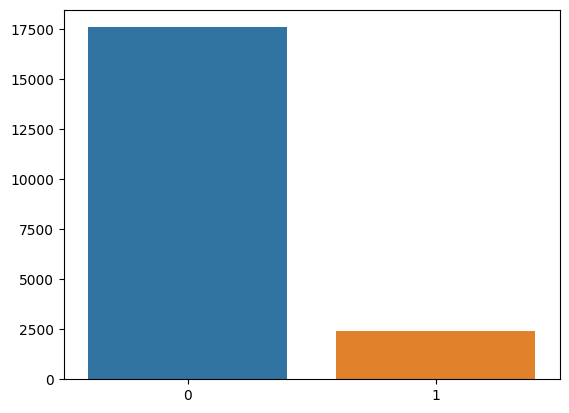

In [14]:
count_df = hotel_nonull['is_canceled'].value_counts()
sns.barplot(x=count_df.index, y=count_df.values)

In [15]:
pd.get_dummies(hotel_nonull)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,105.0,2,5,0.039532,0,0,1,0,131.500000,1,0,0
1,0,303.0,2,2,0.039532,0,0,0,0,73.950000,1,0,0
2,0,33.0,2,3,0.000000,0,0,0,0,101.965827,1,0,0
3,0,48.0,0,1,0.000000,0,0,1,0,80.300000,1,0,0
4,0,216.0,4,7,0.000000,0,0,2,0,60.900000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,89.0,2,2,0.000000,0,0,0,0,62.000000,0,1,0
19996,1,101.0,0,3,0.000000,0,0,0,0,130.000000,0,1,0
19997,1,277.0,1,2,0.000000,0,0,0,0,100.000000,0,1,0
19998,1,0.0,0,1,0.000000,0,0,0,0,209.000000,1,0,0


In [16]:
df = pd.get_dummies(hotel_nonull)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
import time

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']


smote = SMOTE(random_state=0)
X_sm, y_sm = smote.fit_resample(X, y)



In [17]:
from xgboost import XGBClassifier

start_time = time.time()
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=0)
sm_clf = XGBClassifier(n_estimators=5000, learning_rate=0.05, objective='binary:logistic')
sm_clf.fit(x_sm_train, y_sm_train, 
            eval_set=[(x_sm_test, y_sm_test)],
            eval_metric='auc',
            early_stopping_rounds=20,
            verbose=True)

end_time = time.time()
xgb_time = end_time - start_time
sm_score = sm_clf.score(x_test, y_test)

[0]	validation_0-auc:0.84640
[1]	validation_0-auc:0.84651
[2]	validation_0-auc:0.84789
[3]	validation_0-auc:0.84843
[4]	validation_0-auc:0.84938
[5]	validation_0-auc:0.85290
[6]	validation_0-auc:0.85378
[7]	validation_0-auc:0.85475
[8]	validation_0-auc:0.85640
[9]	validation_0-auc:0.85650
[10]	validation_0-auc:0.85698
[11]	validation_0-auc:0.85765


/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[12]	validation_0-auc:0.85853
[13]	validation_0-auc:0.85836
[14]	validation_0-auc:0.85846
[15]	validation_0-auc:0.86045
[16]	validation_0-auc:0.86114
[17]	validation_0-auc:0.86137
[18]	validation_0-auc:0.86261
[19]	validation_0-auc:0.86299
[20]	validation_0-auc:0.86358
[21]	validation_0-auc:0.86384
[22]	validation_0-auc:0.86401
[23]	validation_0-auc:0.86456
[24]	validation_0-auc:0.86454
[25]	validation_0-auc:0.86609
[26]	validation_0-auc:0.86653
[27]	validation_0-auc:0.86655
[28]	validation_0-auc:0.86706
[29]	validation_0-auc:0.86735
[30]	validation_0-auc:0.86795
[31]	validation_0-auc:0.86858
[32]	validation_0-auc:0.87028
[33]	validation_0-auc:0.87083
[34]	validation_0-auc:0.87146
[35]	validation_0-auc:0.87254
[36]	validation_0-auc:0.87284
[37]	validation_0-auc:0.87314
[38]	validation_0-auc:0.87306
[39]	validation_0-auc:0.87310
[40]	validation_0-auc:0.87320
[41]	validation_0-auc:0.87377
[42]	validation_0-auc:0.87384
[43]	validation_0-auc:0.87389
[44]	validation_0-auc:0.87433
[45]	valid

NameError: name 'x_test' is not defined

In [19]:
from xgboost import XGBClassifier

start_time = time.time()
or_clf = XGBClassifier(n_estimators=5000, learning_rate=0.05, objective='binary:logistic')
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)
or_clf.fit(x_train, y_train, 
            eval_set=[(x_test, y_test)],
            eval_metric='auc',
            early_stopping_rounds=50,
            verbose=True)

end_time = time.time()
or_time = end_time - start_time
or_score = or_clf.score(x_test, y_test)

[0]	validation_0-auc:0.77684
[1]	validation_0-auc:0.77823
[2]	validation_0-auc:0.77802
[3]	validation_0-auc:0.77807
[4]	validation_0-auc:0.77957
[5]	validation_0-auc:0.77961
[6]	validation_0-auc:0.77906
[7]	validation_0-auc:0.77927
[8]	validation_0-auc:0.78002
[9]	validation_0-auc:0.78159
[10]	validation_0-auc:0.78168
[11]	validation_0-auc:0.78123
[12]	validation_0-auc:0.78107
[13]	validation_0-auc:0.78228
[14]	validation_0-auc:0.78212
[15]	validation_0-auc:0.78244
[16]	validation_0-auc:0.78254
[17]	validation_0-auc:0.78230
[18]	validation_0-auc:0.78230
[19]	validation_0-auc:0.78222
[20]	validation_0-auc:0.78192
[21]	validation_0-auc:0.78238


/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/Users/iseongmin/opt/anaconda3/envs/ADP/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[22]	validation_0-auc:0.78231
[23]	validation_0-auc:0.78246
[24]	validation_0-auc:0.78252
[25]	validation_0-auc:0.78251
[26]	validation_0-auc:0.78258
[27]	validation_0-auc:0.78253
[28]	validation_0-auc:0.78225
[29]	validation_0-auc:0.78250
[30]	validation_0-auc:0.78234
[31]	validation_0-auc:0.78224
[32]	validation_0-auc:0.78220
[33]	validation_0-auc:0.78196
[34]	validation_0-auc:0.78163
[35]	validation_0-auc:0.78133
[36]	validation_0-auc:0.78130
[37]	validation_0-auc:0.78204
[38]	validation_0-auc:0.78201
[39]	validation_0-auc:0.78266
[40]	validation_0-auc:0.78275
[41]	validation_0-auc:0.78283
[42]	validation_0-auc:0.78279
[43]	validation_0-auc:0.78332
[44]	validation_0-auc:0.78356
[45]	validation_0-auc:0.78368
[46]	validation_0-auc:0.78405
[47]	validation_0-auc:0.78400
[48]	validation_0-auc:0.78409
[49]	validation_0-auc:0.78498
[50]	validation_0-auc:0.78535
[51]	validation_0-auc:0.78581
[52]	validation_0-auc:0.78586
[53]	validation_0-auc:0.78608
[54]	validation_0-auc:0.78652
[55]	valid

In [25]:
print(f'SMOTE \nscore \t {sm_score:.5f} \n time \t {xgb_time:.5f}')
print()
print(f'original \nscore \t {or_score:.5f} \n time \t {or_time:.5f}')

NameError: name 'sm_score' is not defined

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_sm_test, sm_clf.predict(x_sm_test)))
print(classification_report(y_test, sm_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      5215
           1       0.95      0.90      0.92      5342

    accuracy                           0.93     10557
   macro avg       0.93      0.93      0.93     10557
weighted avg       0.93      0.93      0.93     10557

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5279
           1       0.82      0.68      0.74       720

    accuracy                           0.94      5999
   macro avg       0.89      0.83      0.86      5999
weighted avg       0.94      0.94      0.94      5999



# 통계분석

-  귀무가설 : 시제품 농도의 평균은 60이다.
-  대립가설 : 60이 아니다

In [27]:
data = [52, 50, 62, 75,26,45,62,35,57, 14]
data

[52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

In [28]:
from scipy.stats import ttest_1samp

ttest_1samp(data, 62)

Ttest_1sampResult(statistic=-2.443438323531028, pvalue=0.03715449405038336)

- p_value 0.05보다 작으므로 귀무가설 기각

In [29]:
from scipy.stats import shapiro
shapiro(data)

ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

<AxesSubplot:ylabel='Density'>

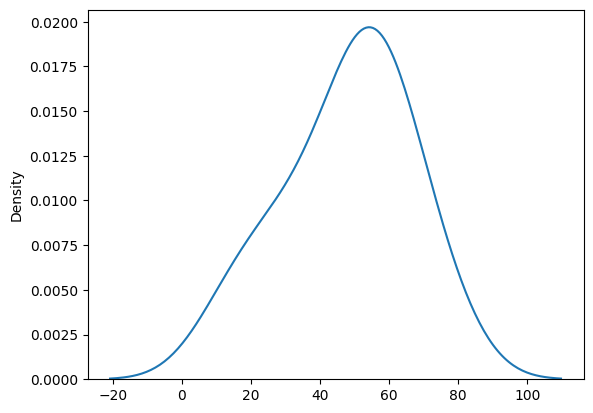

In [30]:
sns.kdeplot(data)

In [31]:
import pandas as pd
covid = pd.read_csv('../data/서울특별시 코로나19.csv')
covid

,날짜,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
1,2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2,2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
3,2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
4,2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,2020-02-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783,2020-02-06,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


In [32]:
covid1 = covid.drop(['날짜'], axis=1)

In [34]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags=n_lags)
n_lags= 785
lag_arr = np.repeat(n_lags, covid1.shape[1])
acf_list = list(map(acf, covid1.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = covid1.columns

acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


In [38]:
acf_df = acf_df.T

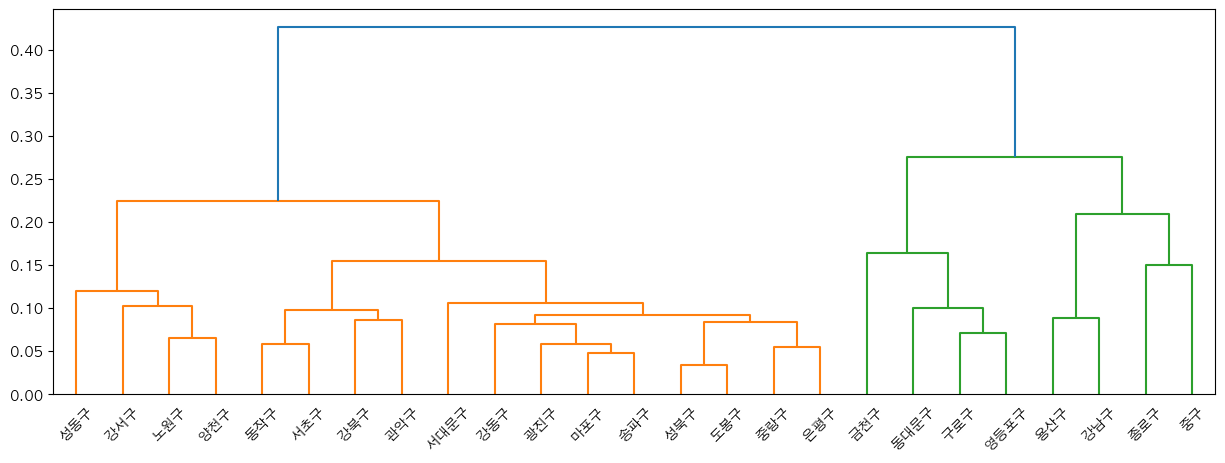

In [41]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "AppleGothic"
plt.figure(figsize=(15, 5))
label = acf_df.index
dend1 = sch.linkage(acf_df, method='average')
# cutoff = 0.5*max(dend1[:, 2])
dend_res1 = sch.dendrogram(dend1, labels=label)
plt.show()

In [45]:
society = [16, 30, 12]
science = [12, 20, 3]
engneering = [18, 13, 14]

table = pd.DataFrame({'사회과학':society, '자연과학':science, '공학': engneering},
                    index=['3.5~4.5', '2.5~3.5', '1.5~2.5'])
table

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


In [47]:
from scipy import stats
*some, exp = stats.chi2_contingency(observed=table)

In [52]:
pd.DataFrame(exp, columns=table.columns, index=table.index)

,사회과학,자연과학,공학
3.5~4.5,19.333333,11.666667,15.000000
2.5~3.5,26.478261,15.978261,20.543478
1.5~2.5,12.188406,7.355072,9.456522
